In [229]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt

#Primero leemos todos los archivos txt
array_reposo = np.genfromtxt("Reposo_EKG.txt",delimiter="	",skip_header = 2)
array_respiracion=np.genfromtxt("Respiración_EKG.txt",delimiter="	",skip_header = 2)
array_ejercicio=np.genfromtxt("Ejercicio_EKG.txt",delimiter="	",skip_header = 2)

#Guardamos los valores de cada caso a un tipo de array
valores_reposo=array_reposo[:,-2]
valores_respiracion=array_respiracion[:,-2]
valores_ejercicio=array_ejercicio[:,-2]

#Determinamos la longitud de cada arreglo
cantidad_reposo=np.size(valores_reposo);
cantidad_respiracion=np.size(valores_respiracion);
cantidad_ejercicio=np.size(valores_ejercicio);

#Creamos los vectores de tiempo para cada caso
tiempo_reposo=np.arange(0,cantidad_reposo)
tiempo_reposo=tiempo_reposo/1000

tiempo_respiracion=np.arange(0,cantidad_respiracion)
tiempo_respiracion=tiempo_respiracion/1000

tiempo_ejercicio=np.arange(0,cantidad_ejercicio)
tiempo_ejercicio=tiempo_ejercicio/1000

#Convertimos los valores ADC a voltaje (mV)
valores_reposo=(((valores_reposo/1024)-0.5)*3.3)/(1100)
valores_reposo=valores_reposo*1000

valores_respiracion=(((valores_respiracion/1024)-0.5)*3.3)/(1100)
valores_respiracion=valores_respiracion*1000

valores_ejercicio=(((valores_ejercicio/1024)-0.5)*3.3)/(1100)
valores_ejercicio=valores_ejercicio*1000



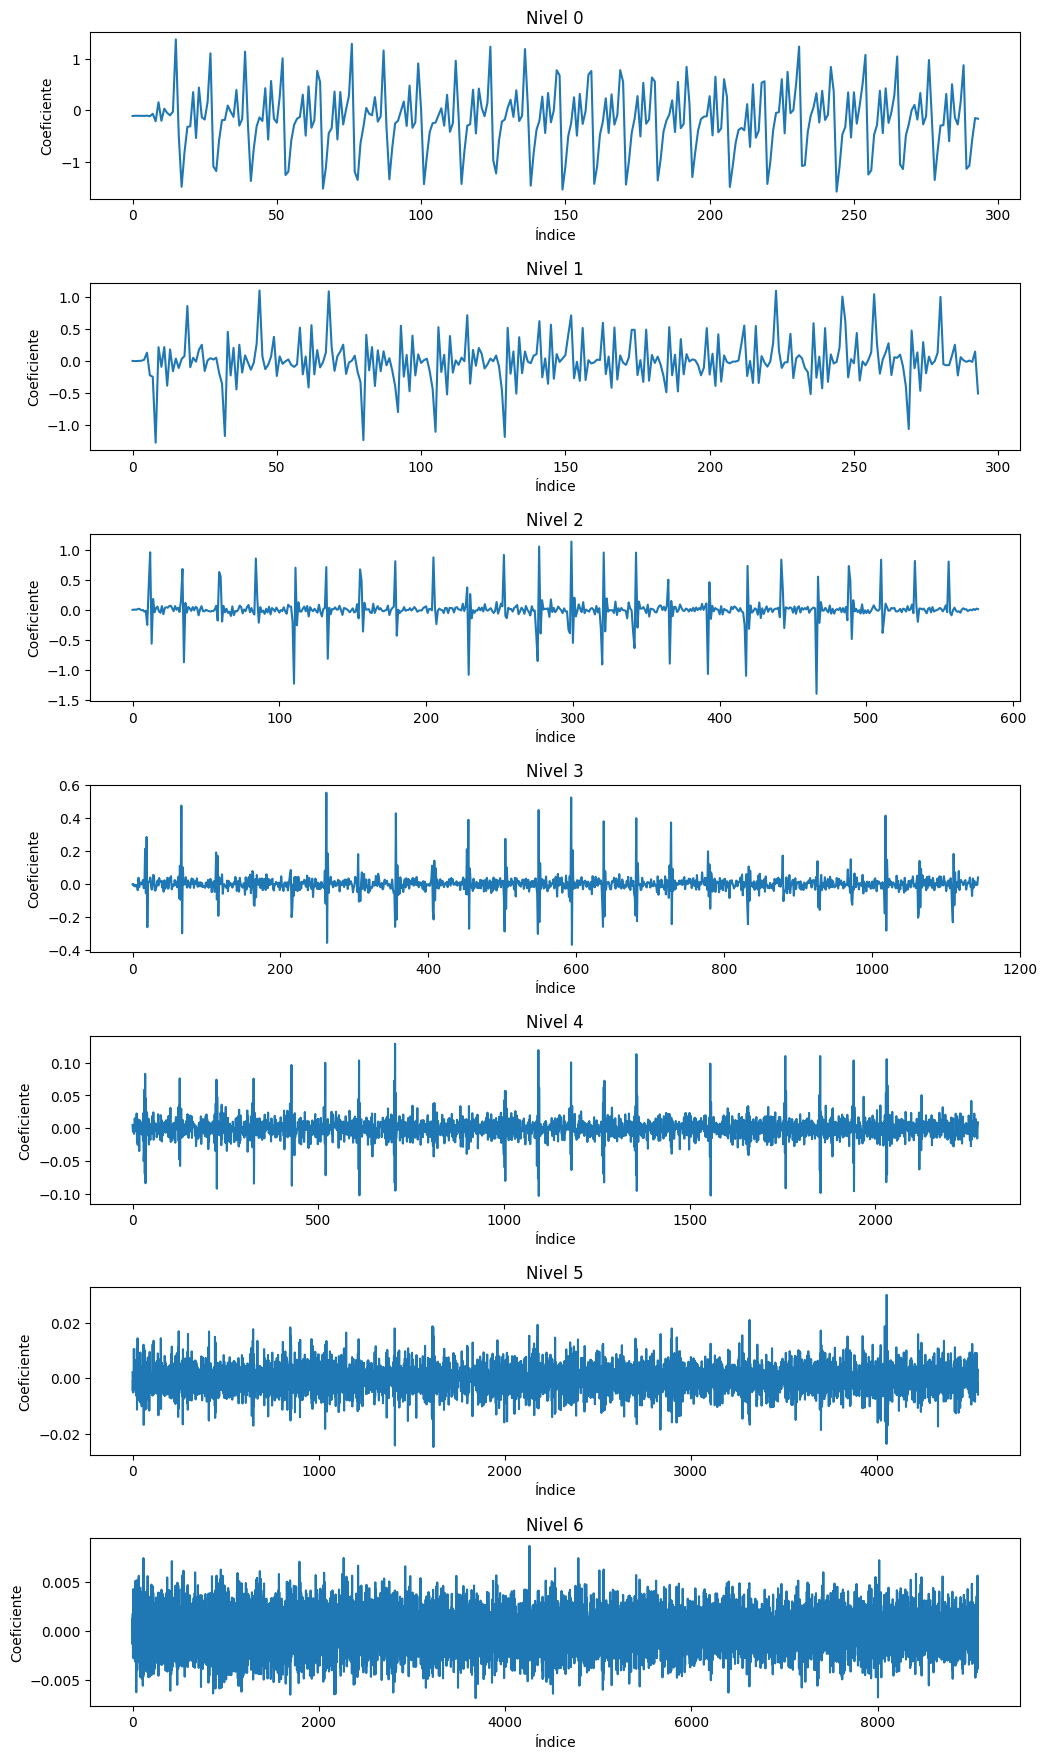

In [230]:
#COMENZAREMOS CON LA PRIMERA SEÑAL (EN REPOSO)

#De acuerdo a la literatura, se utilizo un wavelet Daubechie
coeffs = pywt.wavedec(valores_reposo, 'db6', level=6)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)

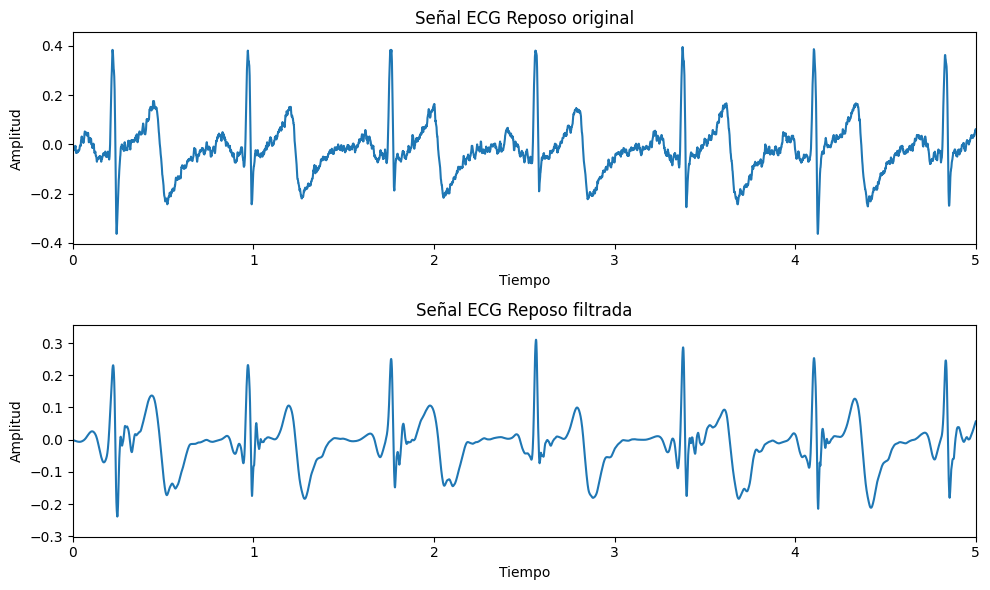

In [231]:
#FILTRAR SEÑAL ECG REPOSO FILTRADA
#Para el filtrado de la senal, se hizo uso de un umbral (Threshold)
#El valor de este umbral fue de 0.22 en la literatura, ya que mostraba los resultados mas optimos
umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

ecg_reposo_filtrado = pywt.waverec(coeffs_umbral, 'db6')

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_reposo, valores_reposo)
plt.title('Señal ECG Reposo original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([0,5])

plt.subplot(2, 1, 2)
plt.plot(tiempo_reposo, ecg_reposo_filtrado)
plt.title('Señal ECG Reposo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([0,5])

plt.tight_layout()
plt.show()

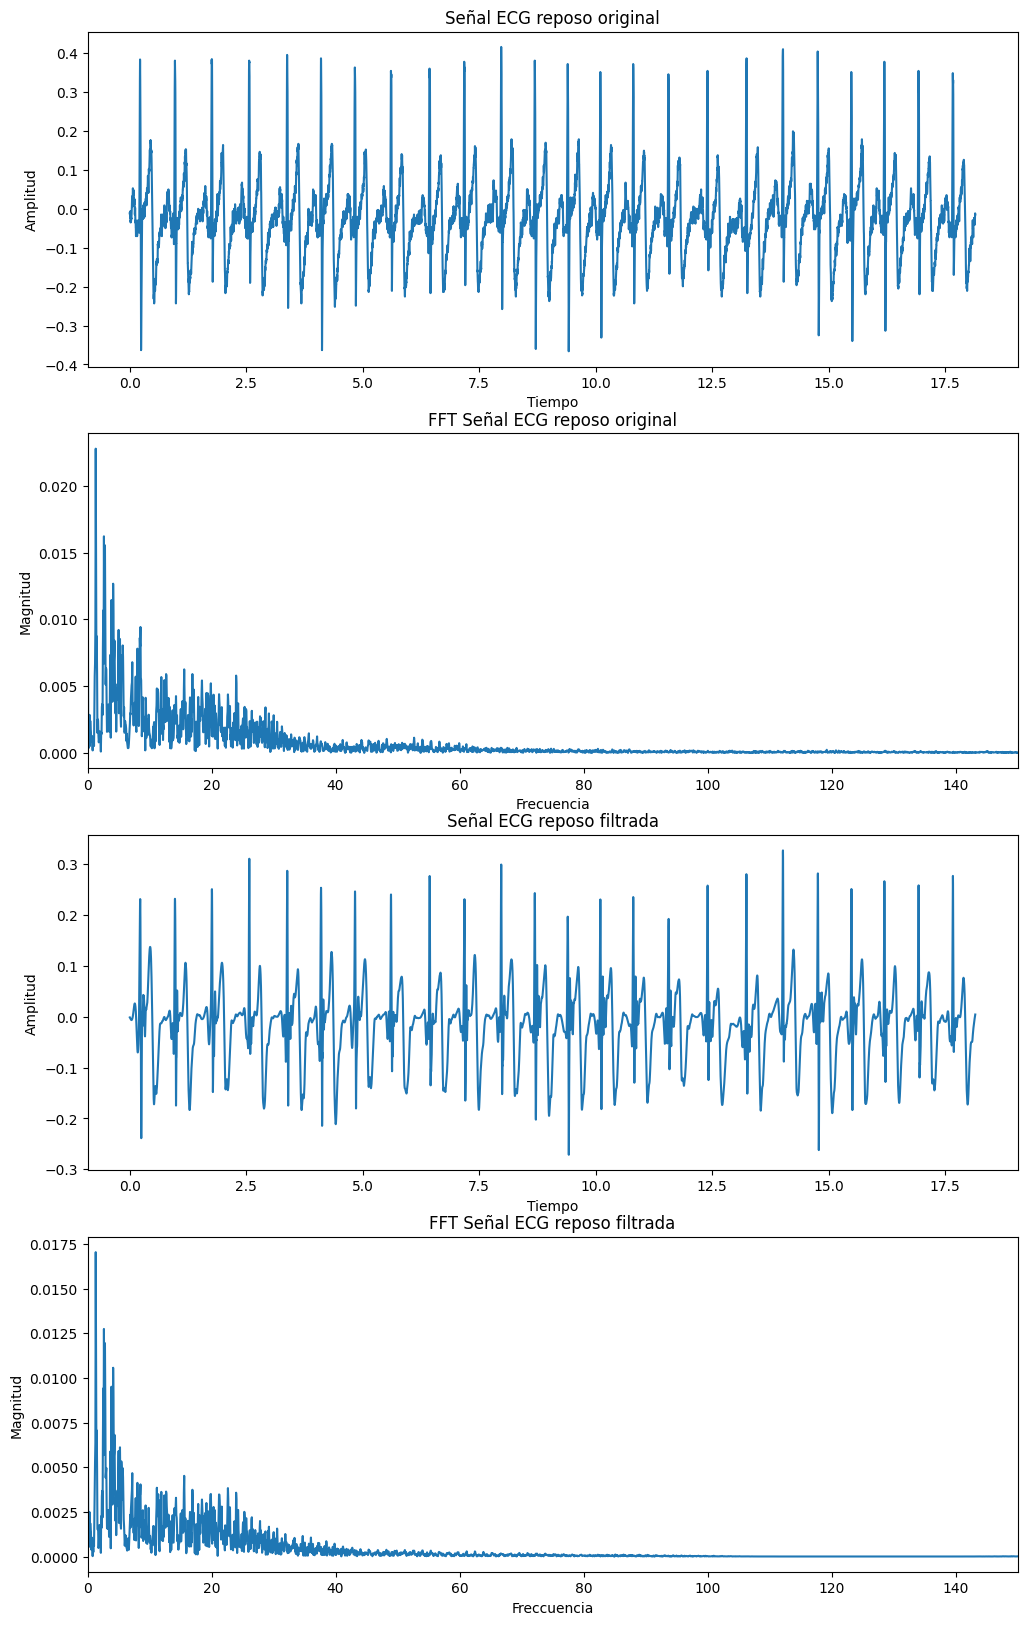

In [232]:
plt.figure(figsize=(12, 20))
plt.subplot(4, 1, 1)
plt.plot(tiempo_reposo, valores_reposo)
plt.title('Señal ECG reposo original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(valores_reposo, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG reposo original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(tiempo_reposo, ecg_reposo_filtrado)
plt.title('Señal ECG reposo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(ecg_reposo_filtrado, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG reposo filtrada')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')
plt.show()

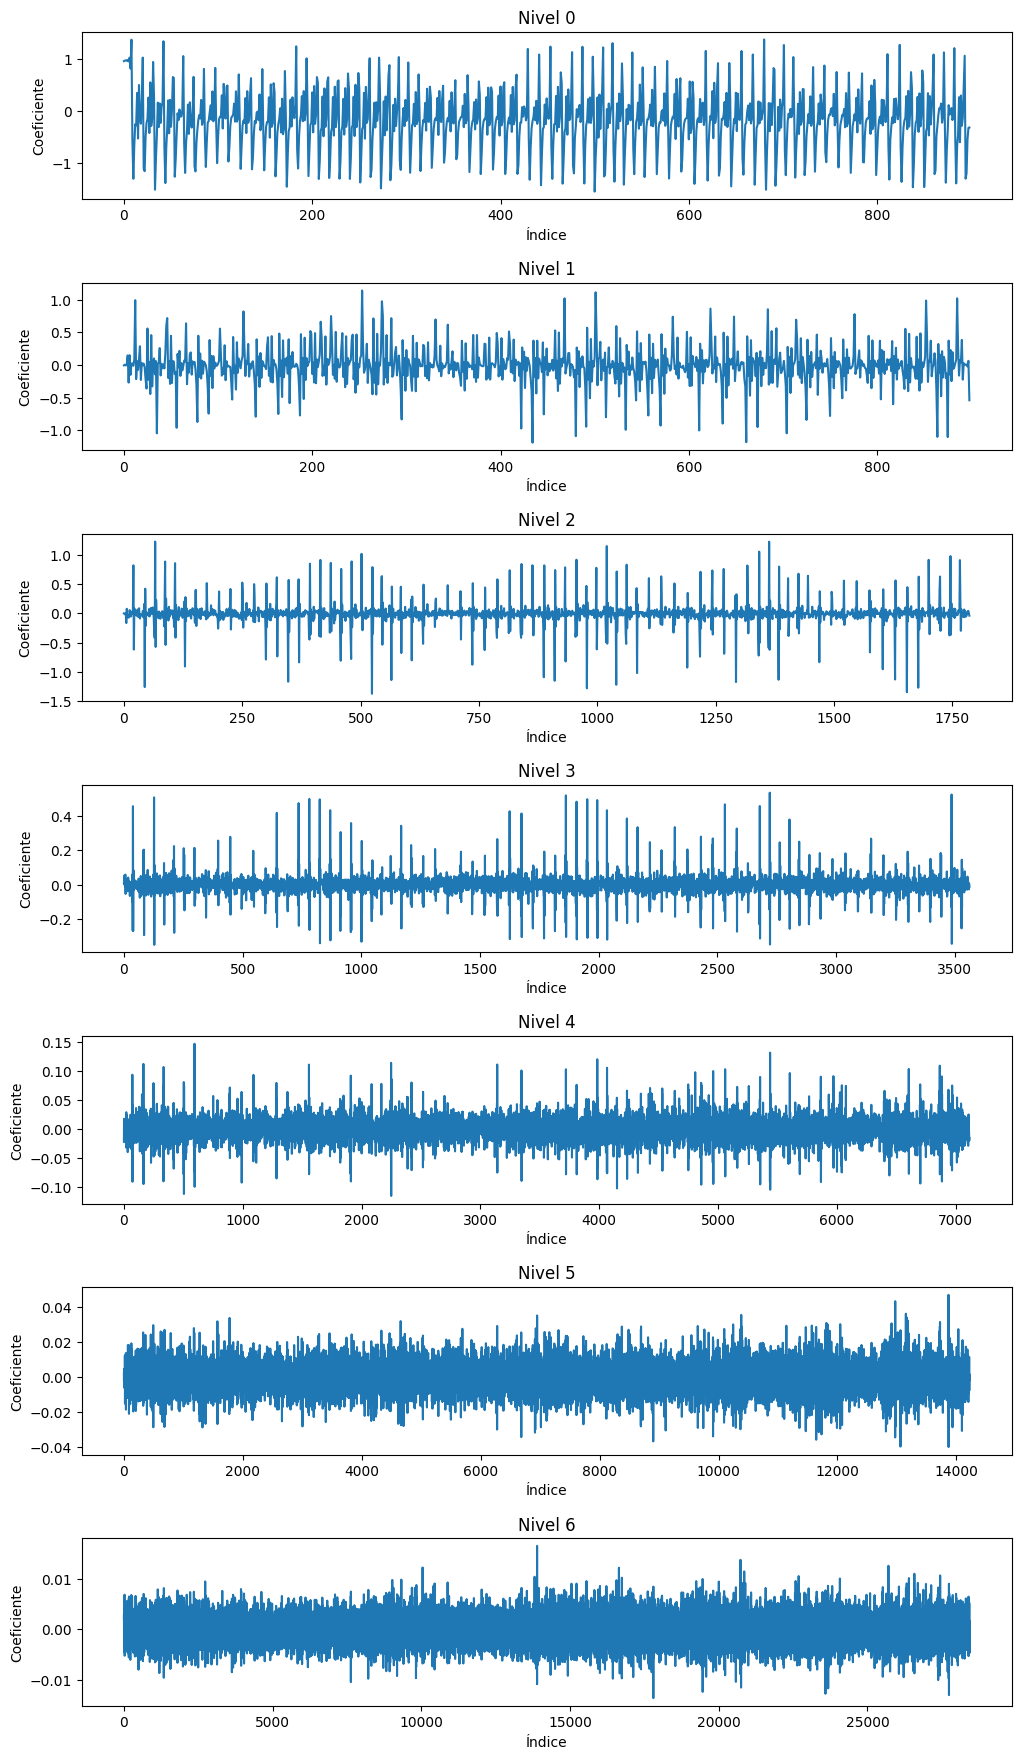

In [233]:
#Repetimos el proceso con la senal en respiracion
coeffs_respiracion = pywt.wavedec(valores_respiracion, 'db6', level=6)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs_respiracion):
    plt.subplot(len(coeffs_respiracion) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)


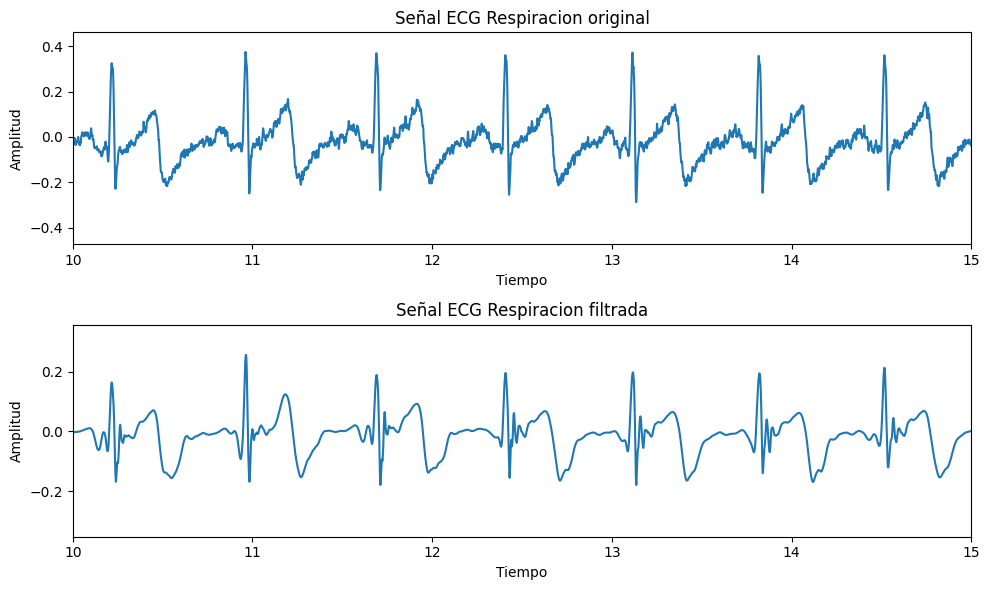

In [234]:
#FILTRAR SEÑAL ECG RESPIRACION FILTRADA
#Para el filtrado de la senal, se hizo uso de un umbral (Threshold)
#El valor de este umbral fue de 0.22 en la literatura, ya que mostraba los resultados mas optimos
umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs_respiracion]

ecg_respiracion_filtrado = pywt.waverec(coeffs_umbral, 'db6')

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_respiracion, valores_respiracion)
plt.title('Señal ECG Respiracion original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([10,15])

plt.subplot(2, 1, 2)
plt.plot(tiempo_respiracion, ecg_respiracion_filtrado)
plt.title('Señal ECG Respiracion filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([10,15])

plt.tight_layout()
plt.show()

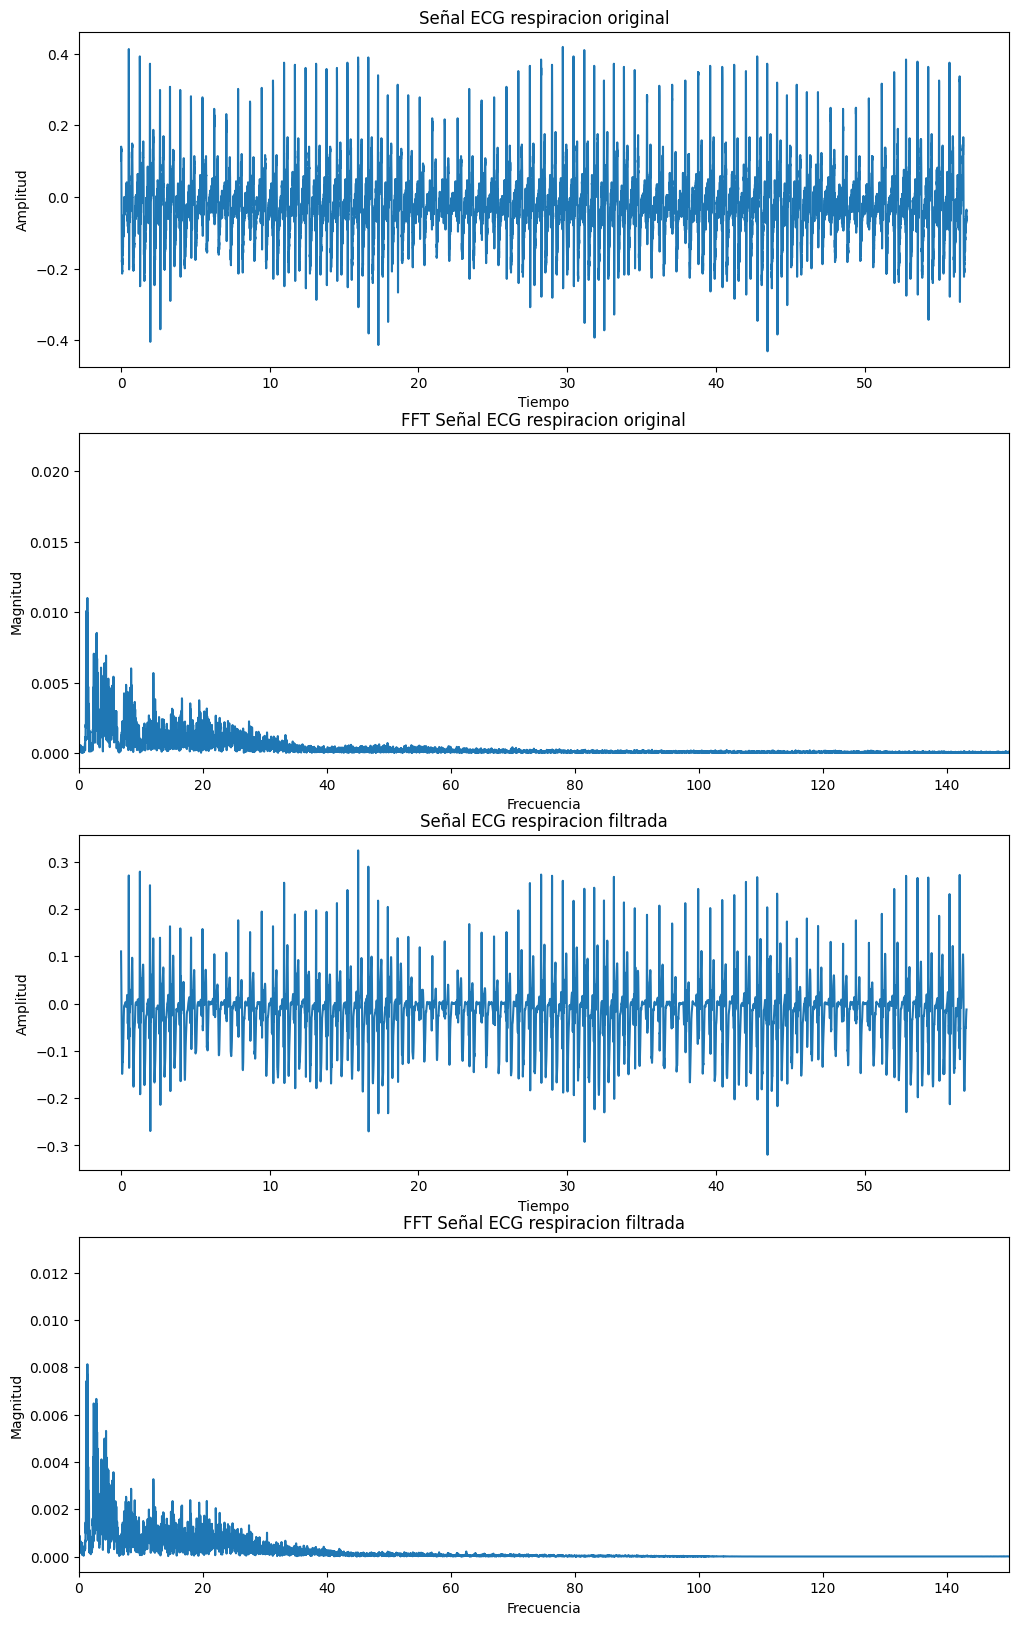

In [235]:
plt.figure(figsize=(12, 20))
plt.subplot(4, 1, 1)
plt.plot(tiempo_respiracion, valores_respiracion)
plt.title('Señal ECG respiracion original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(valores_respiracion, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG respiracion original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(tiempo_respiracion, ecg_respiracion_filtrado)
plt.title('Señal ECG respiracion filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(ecg_respiracion_filtrado, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG respiracion filtrada')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()

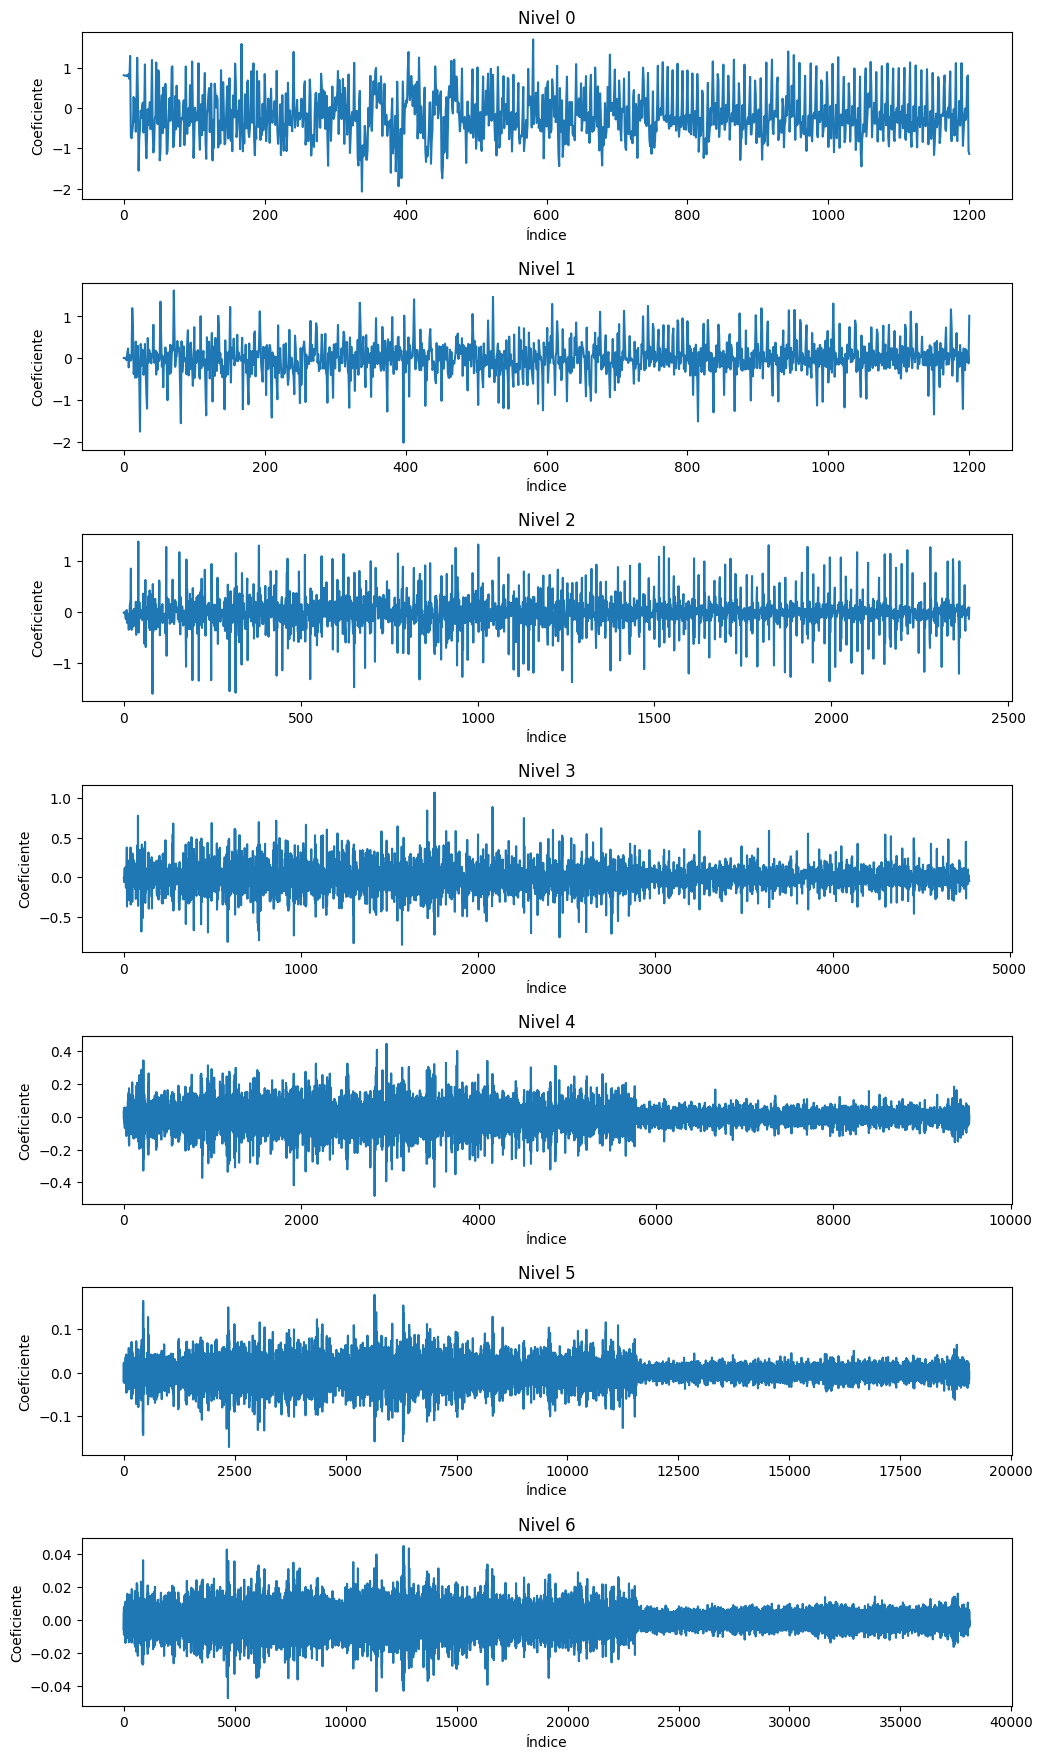

In [236]:
#Ahora haremos el filtro con la senal tras ejercicio
coeffs_ejercicio = pywt.wavedec(valores_ejercicio, 'db6', level=6)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs_ejercicio):
    plt.subplot(len(coeffs_ejercicio) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)


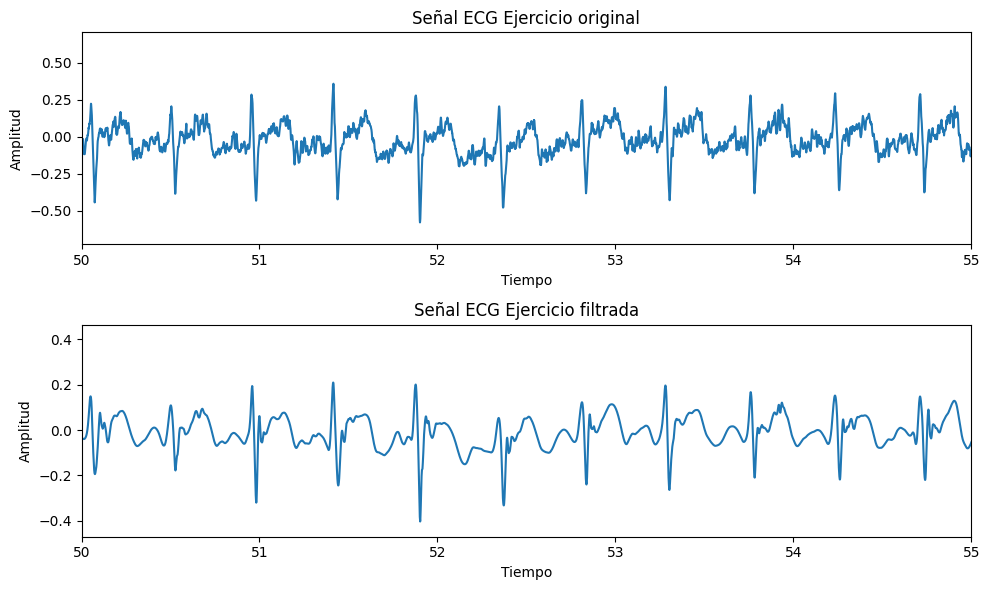

In [237]:
umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs_ejercicio]

ecg_ejercicio_filtrado = pywt.waverec(coeffs_umbral, 'db6')

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_ejercicio, valores_ejercicio)
plt.title('Señal ECG Ejercicio original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([50,55])

plt.subplot(2, 1, 2)
plt.plot(tiempo_ejercicio, ecg_ejercicio_filtrado)
plt.title('Señal ECG Ejercicio filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([50,55])

plt.tight_layout()
plt.show()

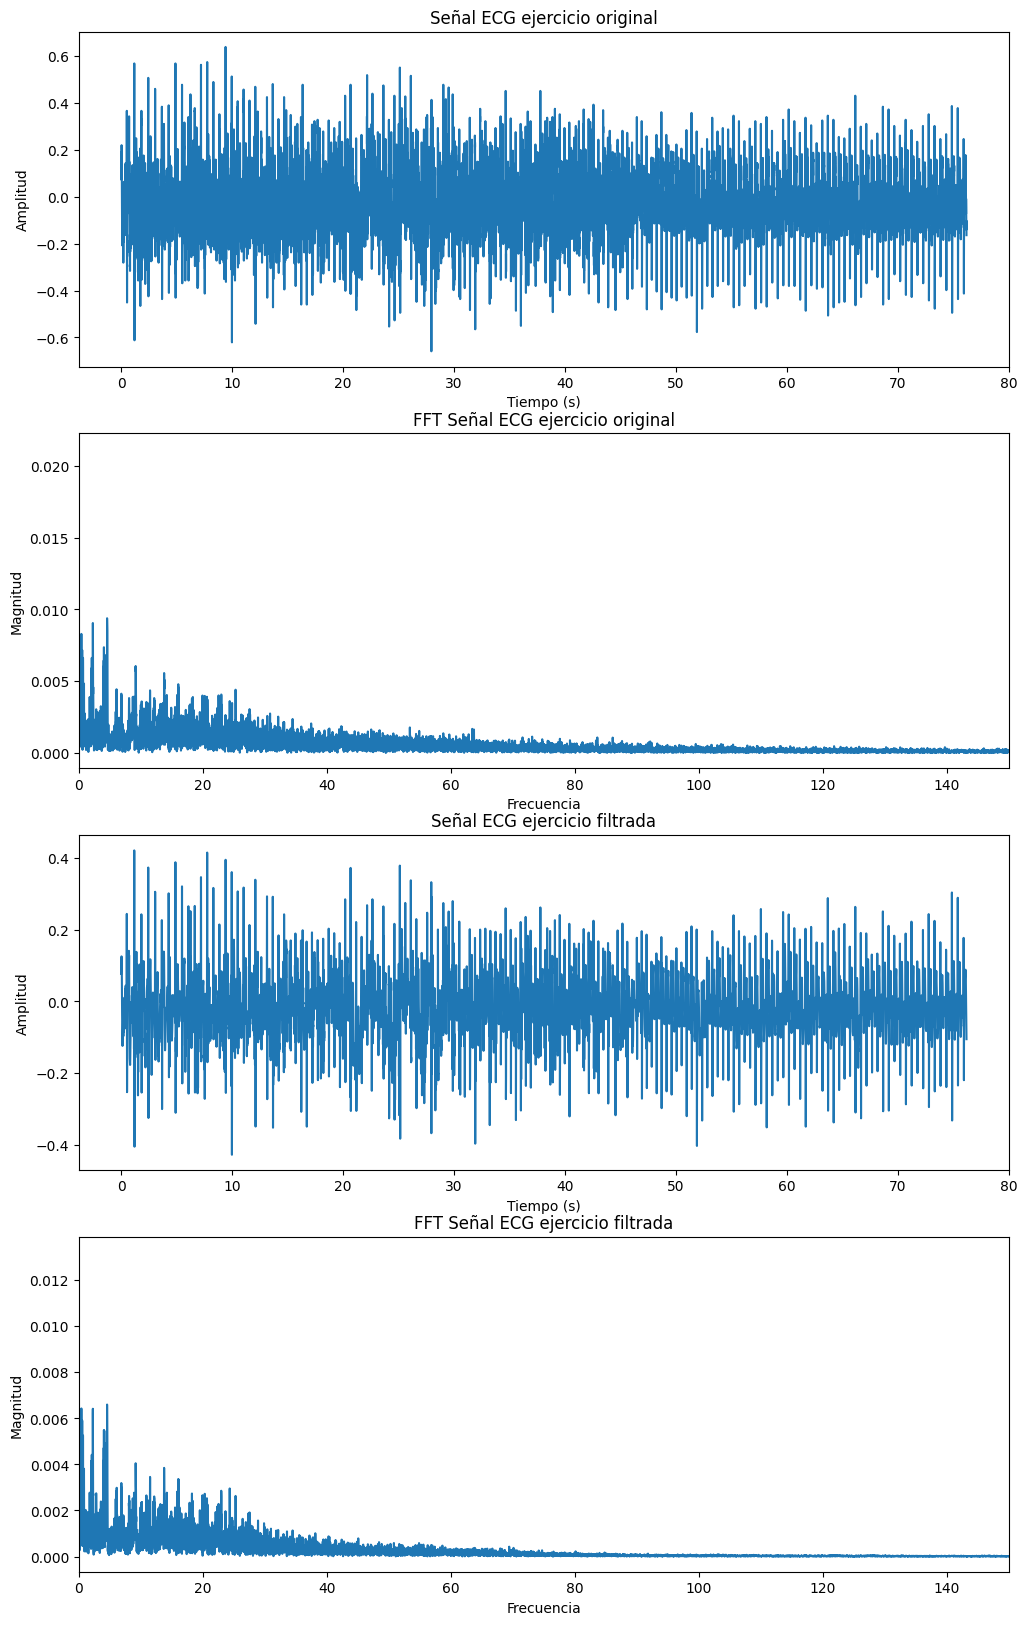

In [238]:
plt.figure(figsize=(12, 20))
plt.subplot(4, 1, 1)
plt.plot(tiempo_ejercicio, valores_ejercicio)
plt.title('Señal ECG ejercicio original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(valores_ejercicio, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG ejercicio original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(tiempo_ejercicio, ecg_ejercicio_filtrado)
plt.title('Señal ECG ejercicio filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(ecg_ejercicio_filtrado, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG ejercicio filtrada')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()

# Hallar los picos R

In [239]:
from scipy.signal import find_peaks

## Reposo

In [240]:
print(tiempo_reposo[-1])

18.149


La duración se la señal es de 18.149 segundos por lo que se escogerá una ventana de 10 segundos, en este caso de 5 a 15 segundos

In [241]:
# Definir el tiempo de inicio para segmentar la señal
t_start = 5
t_end=  15
Fs=1000
# Encontrar el índice correspondiente al tiempo de inicio
start_index = int(t_start * Fs)
end_index=int(t_end*Fs)
# Segmentar los datos
t_reposo = tiempo_reposo[start_index:end_index]
ecg_reposo_filtrado = ecg_reposo_filtrado[start_index:end_index]
ecg_reposo=valores_reposo[start_index:end_index]

### Señal sin filtrar

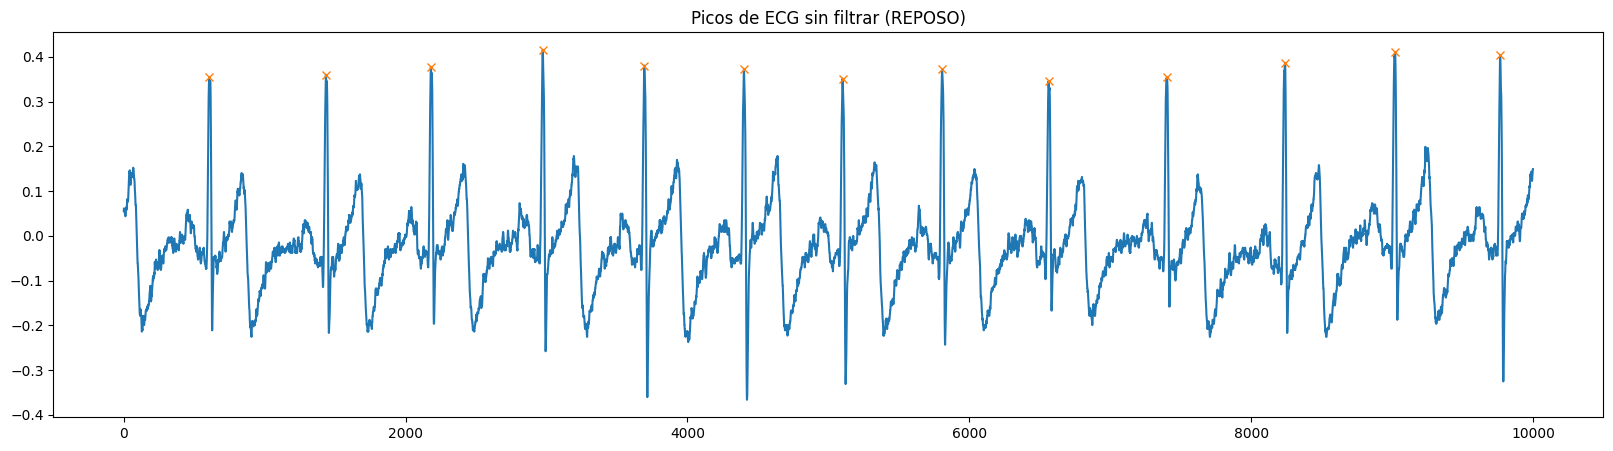

In [242]:
peaks, _ = find_peaks(ecg_reposo, distance=650)
plt.figure(figsize=(20,5))
plt.plot(ecg_reposo)
plt.plot(peaks, ecg_reposo[peaks], "x")
plt.title('Picos de ECG sin filtrar (REPOSO)')
plt.show()

### Señal filtrada

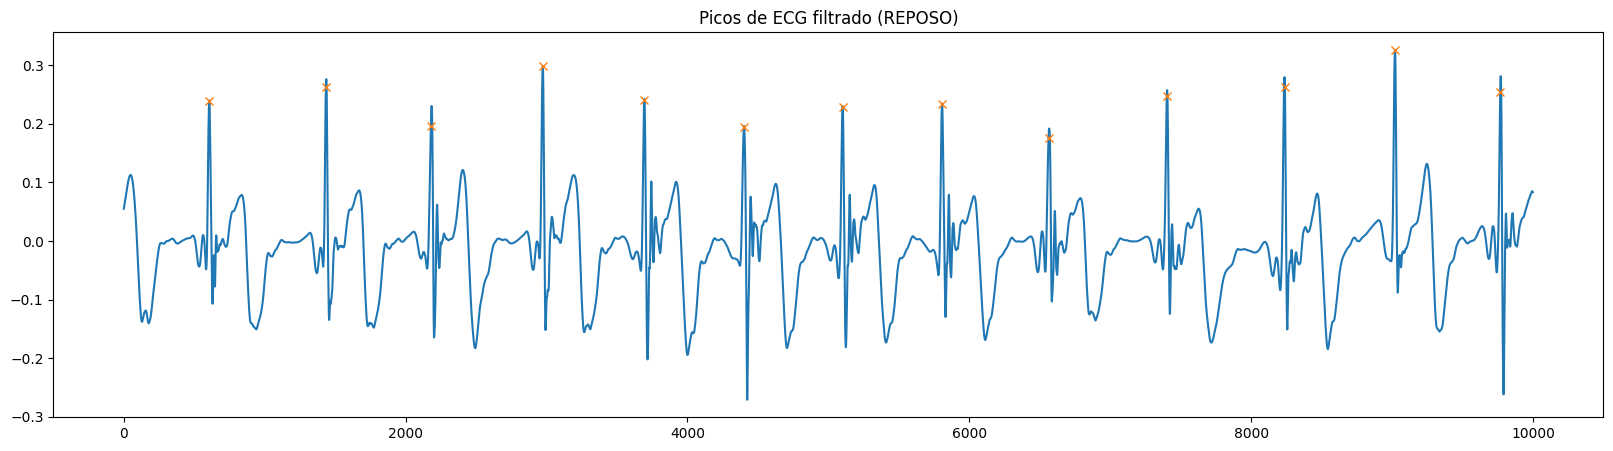

In [243]:
peaks_reposo, _ = find_peaks(ecg_reposo_filtrado, distance=600)
plt.figure(figsize=(20,5))
plt.plot(ecg_reposo_filtrado)
plt.plot(peaks, ecg_reposo_filtrado[peaks], "x")
#plt.xlabel("Tiempo (s)")
#plt.xlim(0 ,100)
plt.title('Picos de ECG filtrado (REPOSO)')
plt.show()

## Respiración

In [244]:
print(tiempo_respiracion[-1])

56.849


La duración se la señal es de 56.849 segundos por lo que se escogerá una ventana de 10 segundos

In [245]:
# Definir el tiempo de inicio para segmentar la señal
t_start = 5
t_end=  15
Fs=1000
# Encontrar el índice correspondiente al tiempo de inicio
start_index = int(t_start * Fs)
end_index=int(t_end*Fs)
# Segmentar los datos
t_respiracion = tiempo_respiracion[start_index:end_index]
ecg_respiracion_filtrado = ecg_respiracion_filtrado[start_index:end_index]
ecg_respiracion=valores_respiracion[start_index:end_index]

### Señal sin filtrar

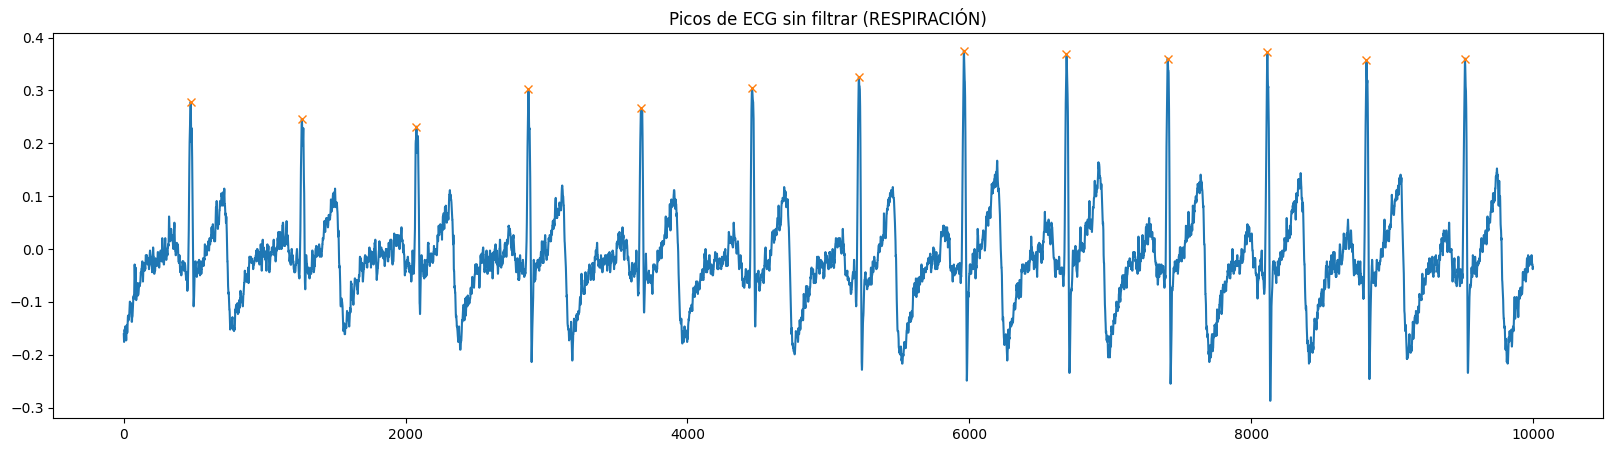

In [246]:
peaks, _ = find_peaks(ecg_respiracion, distance=650)
plt.figure(figsize=(20,5))
plt.plot(ecg_respiracion)
plt.plot(peaks, ecg_respiracion[peaks], "x")
plt.title('Picos de ECG sin filtrar (RESPIRACIÓN)')
plt.show()

### Señal filtrada

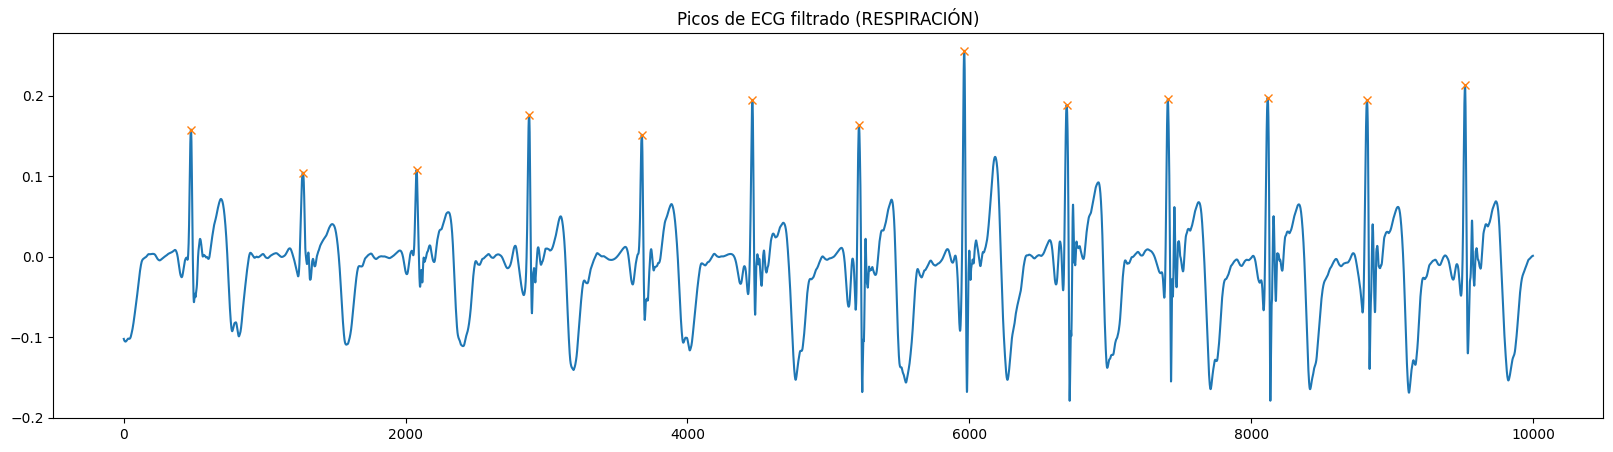

In [247]:
peaks_respiracion, _ = find_peaks(ecg_respiracion_filtrado, distance=600)
plt.figure(figsize=(20,5))
plt.plot(ecg_respiracion_filtrado)
plt.plot(peaks_respiracion, ecg_respiracion_filtrado[peaks_respiracion], "x")
plt.title('Picos de ECG filtrado (RESPIRACIÓN)')
plt.show()

## Ejercicio

In [248]:
print(tiempo_ejercicio[-1])

76.199


La duración se la señal es de 76.199 segundos por lo que se escogerá una ventana de 10 segundos

In [249]:
# Definir el tiempo de inicio para segmentar la señal
t_start = 5
t_end=  15
Fs=1000
# Encontrar el índice correspondiente al tiempo de inicio
start_index = int(t_start * Fs)
end_index=int(t_end*Fs)
# Segmentar los datos
t_ejercicio = tiempo_ejercicio[start_index:end_index]
ecg_ejercicio_filtradoS = ecg_ejercicio_filtrado[start_index:end_index]
ecg_ejercicio =valores_ejercicio[start_index:end_index]

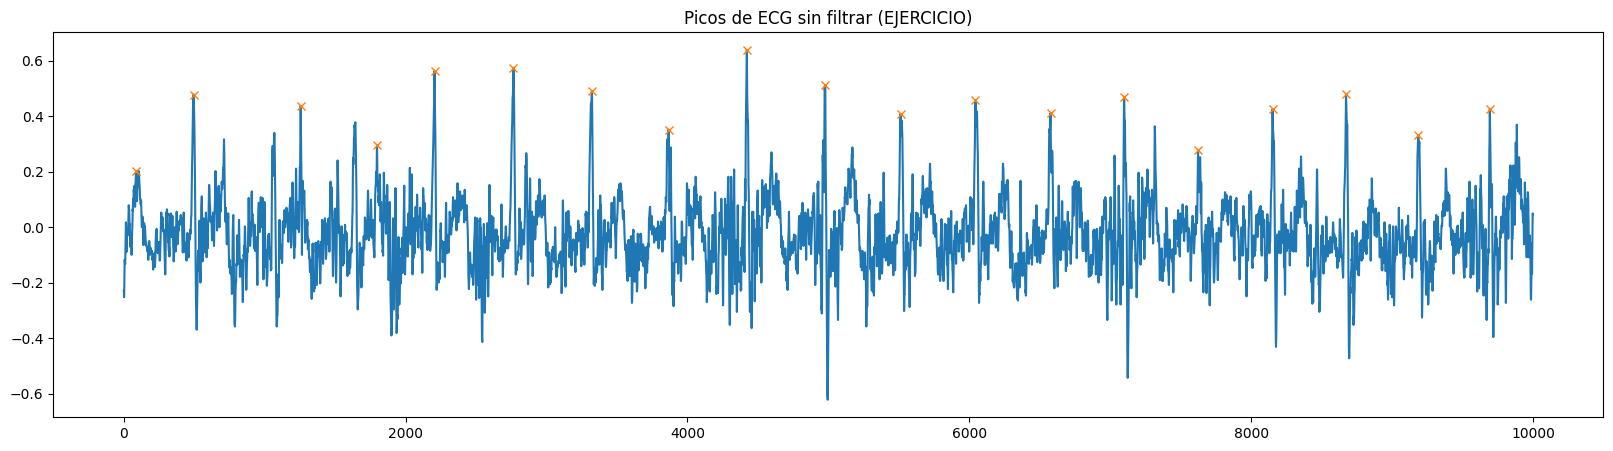

In [250]:
peaks, _ = find_peaks(ecg_ejercicio, distance=400)
plt.figure(figsize=(20,5))
plt.plot(ecg_ejercicio)
plt.plot(peaks, ecg_ejercicio[peaks], "x")
plt.title('Picos de ECG sin filtrar (EJERCICIO)')
plt.show()

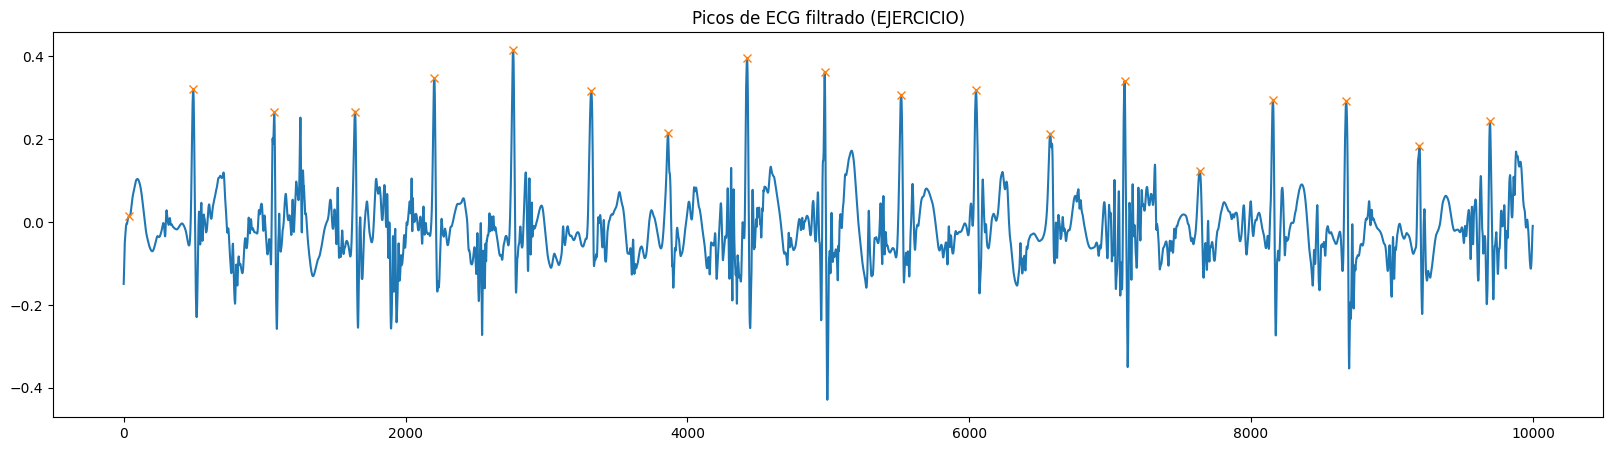

In [251]:
peaks_ejercicio, _ = find_peaks(ecg_ejercicio_filtradoS, distance=450)
plt.figure(figsize=(20,5))
plt.plot(ecg_ejercicio_filtradoS)
plt.plot(peaks_ejercicio, ecg_ejercicio_filtradoS[peaks_ejercicio], "x")
plt.title('Picos de ECG filtrado (EJERCICIO)')
plt.show()

# Diferencia de picos R - R

## Reposo

[ 607 1437 2184 2973 3694 4401 5101 5807 6567 7403 8236 9021 9771]
[830 747 789 721 707 700 706 760 836 833 785 750]


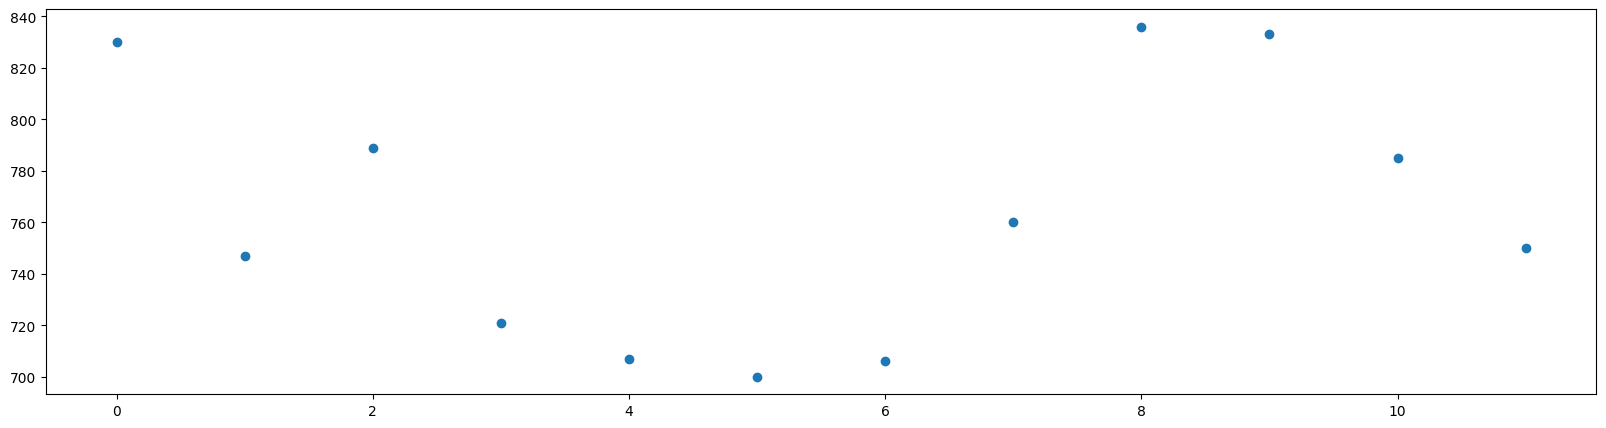

In [258]:
print(peaks_reposo)
dif_reposo=np.diff(peaks_reposo)
print(dif_reposo)
plt.figure(figsize=(20,5))
plt.plot(dif_reposo,'o')

## Respiración

In [253]:
print(peaks_respiracion)
dif_respiracion=np.diff(peaks_respiracion)
print(dif_respiracion)

[ 477 1270 2078 2876 3676 4460 5217 5964 6691 7408 8117 8822 9517]
[793 808 798 800 784 757 747 727 717 709 705 695]


## Ejercicio

In [254]:
print(peaks_ejercicio)
dif_ejercicio=np.diff(peaks_ejercicio)
print(dif_ejercicio)

[  40  494 1068 1642 2204 2763 3318 3862 4423 4975 5517 6048 6575 7102
 7636 8155 8675 9195 9695]
[454 574 574 562 559 555 544 561 552 542 531 527 527 534 519 520 520 500]


## Comparando los 3 estadíos

<Figure size 2000x500 with 0 Axes>

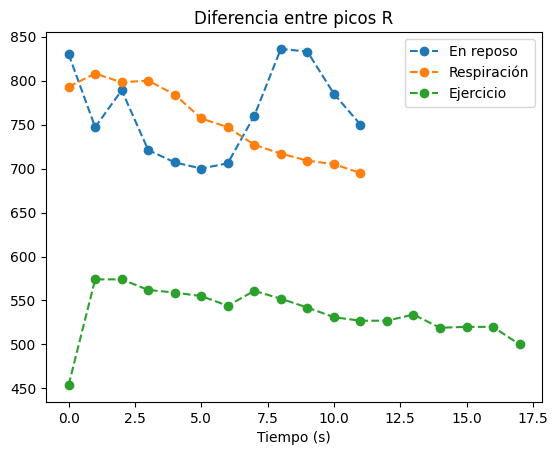

In [265]:
plt.figure(figsize=(20,5))
fig, ax = plt.subplots()
# Graficar cada conjunto de datos
ax.plot(dif_reposo,'o--', label='En reposo')
ax.plot(dif_respiracion,'o--', label='Respiración')
ax.plot(dif_ejercicio,'o--', label='Ejercicio')

# Agregar la leyenda
ax.legend()
plt.title("Diferencia entre picos R")
plt.xlabel("Tiempo (s)")
plt.show()

# rMSSD

Para hallar el este valor, estamos basándonos en la siguiente ecuación

In [266]:
# Calculate rMSSD
def calculate_rmssd(dif_reposo):
    rr_diff = np.diff(dif_reposo)
    squared_diff = np.square(rr_diff)
    mean_squared_diff = np.mean(squared_diff)
    rmssd = np.sqrt(mean_squared_diff)
    return rmssd

## Reposo

In [268]:
rmssd_reposo=calculate_rmssd(dif_reposo)
print(rmssd_reposo)

48.41862902193366


## Ejercicio

In [269]:
rmssd_ejercicio=calculate_rmssd(dif_ejercicio)
print(rmssd_ejercicio)

30.65174402484638


## Respiración

In [270]:
rmssd_respiracion=calculate_rmssd(dif_respiracion)
print(rmssd_respiracion)

13.797232924164048
